In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data_root = '/content/drive/My Drive/dataset1'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense ,BatchNormalization
from keras import backend as K 
import numpy as np
from keras.optimizers import *
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
img_width, img_height = 150, 150
  
train_data_dir = '/content/drive/My Drive/dataset1/train'
validation_data_dir = '/content/drive/My Drive/dataset1/test'
train_samples = 880
validation_samples = 220
epochs = 20
batch_size = 10
filter_pixel=3


In [ ]:
from keras import backend as K 
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [ ]:
train_datagen = ImageDataGenerator( 
                rotation_range=20.,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                vertical_flip=True) 
  
test_datagen = ImageDataGenerator(rescale = 1. / 255) 
  
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                              target_size =(img_width, img_height), 
                     batch_size = batch_size, class_mode ='categorical') 
  
validation_generator = test_datagen.flow_from_directory( 
                                    validation_data_dir, 
                   target_size =(img_width, img_height), 
          batch_size = batch_size, class_mode ='categorical')

Found 2640 images belonging to 3 classes.
Found 660 images belonging to 3 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(filter_pixel, filter_pixel), padding="same",
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(64, kernel_size=(3,3), activation='relu',border_mode="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',border_mode="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))


model.add(Flatten()) 
model.add(Dense(3,use_bias=False)) 
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.25))      

model.add(Dense(3)) 
model.add(Activation('softmax')) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")`
  app.launch_new_instance()


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 64)      256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 64)       

In [ ]:
opt = SGD(lr=0.1, momentum=0.9,nesterov=True, decay=1e-2)
model.compile(optimizer=opt, loss='categorical_crossentropy',
                   metrics=['categorical_accuracy'])

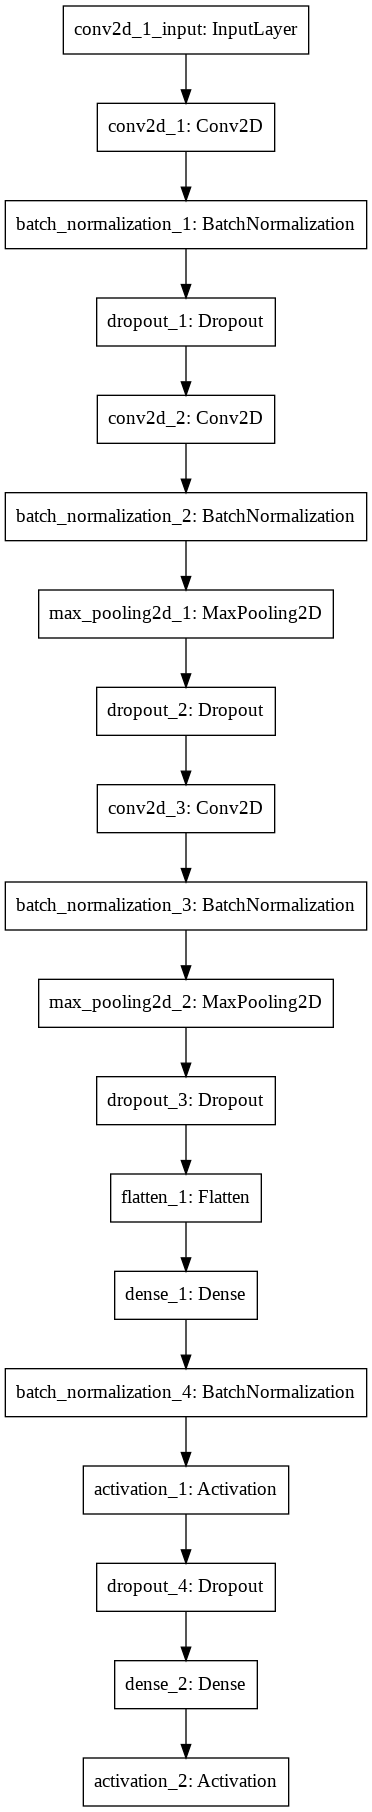

In [ ]:
from keras.utils import plot_model
plot_model(model,to_file='model.png')

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model_path = './model.h5'
callbacks = [
    EarlyStopping(
        monitor='val_acc', 
        patience=10,
        mode='max',
        verbose=1),
    ModelCheckpoint(model_path,
        monitor='val_acc', 
        save_best_only=True, 
        mode='max',
        verbose=0)
]

In [ ]:
history=  model.fit_generator(train_generator, 
    steps_per_epoch = train_samples, 
    epochs = 20, 
    validation_data = validation_generator,
    validation_steps = 50,
    callbacks=callbacks)

Epoch 1/20
880/880 [==============================] - 1078s 1s/step - loss: 0.9423 - categorical_accuracy: 0.4753 - val_loss: 1.1847 - val_categorical_accuracy: 0.3500
Epoch 2/20
  2/880 [..............................] - ETA: 1:14 - loss: 0.9754 - categorical_accuracy: 0.4000

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_categorical_accuracy,loss,categorical_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


880/880 [==============================] - 102s 116ms/step - loss: 0.8726 - categorical_accuracy: 0.4969 - val_loss: 1.6076 - val_categorical_accuracy: 0.3200
Epoch 3/20
880/880 [==============================] - 85s 97ms/step - loss: 0.8477 - categorical_accuracy: 0.5200 - val_loss: 2.4716 - val_categorical_accuracy: 0.3140
Epoch 4/20
880/880 [==============================] - 85s 97ms/step - loss: 0.8377 - categorical_accuracy: 0.5211 - val_loss: 1.4405 - val_categorical_accuracy: 0.3660
Epoch 5/20
880/880 [==============================] - 85s 96ms/step - loss: 0.8429 - categorical_accuracy: 0.5250 - val_loss: 1.2358 - val_categorical_accuracy: 0.3500
Epoch 6/20
880/880 [==============================] - 88s 100ms/step - loss: 0.8188 - categorical_accuracy: 0.5468 - val_loss: 1.2317 - val_categorical_accuracy: 0.3040
Epoch 7/20
880/880 [==============================] - 86s 98ms/step - loss: 0.8066 - categorical_accuracy: 0.5533 - val_loss: 1.5272 - val_categorical_accuracy: 0.3360


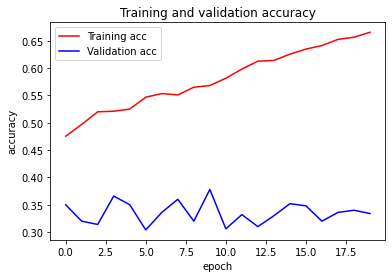

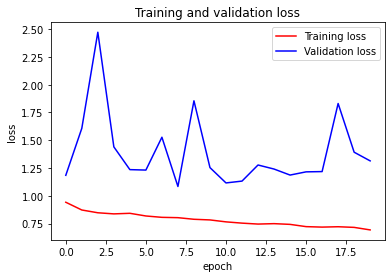

In [ ]:
import matplotlib.pyplot as plt 
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()